<a href="https://colab.research.google.com/github/pusatalamsemestaa/Machine-Learning/blob/main/KNN_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Proses Pra Pengolahan Data & Labeling

## Menginstal library Kaggle pada lingkungan Python kamu, biasanya di Google Colab. Library Kaggle diperlukan jika kamu ingin:

In [ ]:
! pip install -q kaggle

## Menghubungkan (mount) Google Drive ke lingkungan Colab
Sehingga bisa:
1. Mengakses file di Drive (dataset, model, gambar, dll.)
2. Menyimpan hasil pemrosesan ke Drive
3. Memuat model atau dataset dari Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


##
 | Kode                                                                  | Fungsi                                                                                                                  |
| --------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| `import os`                                                           | Menggunakan modul sistem operasi untuk mengelola folder/file (cek path, list directory, dll.)                           |
| `import numpy as np`                                                  | Mengimpor **NumPy**, library untuk operasi matematika dan array (penting dalam pemrosesan citra)                        |
| `import tensorflow as tf`                                             | Mengimpor **TensorFlow**, library untuk deep learning, termasuk pembuatan dan pelatihan model neural network            |
| `from tensorflow.keras.preprocessing.image import ImageDataGenerator` | Mengimpor **ImageDataGenerator** untuk memuat citra dan melakukan **augmentasi gambar** secara otomatis selama training |




In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Wajib: Scaling/Normalisasi: Mengubah rentang nilai piksel (misal: dari 0-255 menjadi 0-1) agar seragam.

### Kategori kacang

In [ ]:
# Pastikan Anda telah me-mount Drive di awal:
# from google.colab import drive
drive.mount('/content/drive')

# --- KODE YANG DIPERBAIKI ---
# data_dir diarahkan ke folder yang berisi FOLDER KELAS (Caju seed 1, Cici seed 1, dll.)
data_dir = '/content/drive/MyDrive/ML /dataset PBL/Training/kacang'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # 80% training, 20% validation
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),   # ubah ukuran citra
    batch_size=32,
    class_mode='categorical', # untuk klasifikasi multi-kelas
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3405 images belonging to 8 classes.
Found 847 images belonging to 8 classes.


### Kategori Jeruk

In [ ]:
# Pastikan Anda telah me-mount Drive di awal:
# from google.colab import drive
drive.mount('/content/drive')

# --- KODE YANG DIPERBAIKI ---
# data_dir diarahkan ke folder yang berisi FOLDER KELAS (Caju seed 1, Cici seed 1, dll.)
data_dir = '/content/drive/MyDrive/ML /dataset PBL/Training/sitrus'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # 80% training, 20% validation
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),   # ubah ukuran citra
    batch_size=32,
    class_mode='categorical', # untuk klasifikasi multi-kelas
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 4668 images belonging to 11 classes.
Found 1165 images belonging to 11 classes.


### Kategori Melon

In [ ]:
# Pastikan Anda telah me-mount Drive di awal:
# from google.colab import drive
drive.mount('/content/drive')

# --- KODE YANG DIPERBAIKI ---
# data_dir diarahkan ke folder yang berisi FOLDER KELAS (Caju seed 1, Cici seed 1, dll.)
data_dir = '/content/drive/MyDrive/ML /dataset PBL/Training/melon'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # 80% training, 20% validation
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),   # ubah ukuran citra
    batch_size=32,
    class_mode='categorical', # untuk klasifikasi multi-kelas
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1379 images belonging to 3 classes.
Found 343 images belonging to 3 classes.


# **2. Proses Ekstraksi Fitur**
Wajib mengekstraksi fitur yang relevan dari citra. Menggunakan piksel mentah (100x100x3) **tidak disarankan** untuk model non-DL.

### Fitur Warna: Color Histogram (RGB atau HSV).

In [ ]:
import cv2
import numpy as np
import os

def extract_color_histogram(image_path, bins=(8, 8, 8)):
    # Baca gambar dan konversi ke HSV
    image = cv2.imread(image_path)
    if image is None:
        # Return None to indicate failure to read image
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Hitung histogram di tiap channel (H, S, V)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins,
                        [0, 180, 0, 256, 0, 256])

    # Normalisasi histogram agar konsisten
    cv2.normalize(hist, hist)

    return hist.flatten()

### Fitur Tekstur: Local Binary Patterns (LBP)

In [ ]:
from skimage.feature import local_binary_pattern

def extract_lbp_features(image_path, P=8, R=1):
    # Baca gambar dalam grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        # Return None to indicate failure to read image
        return None

    # Hitung pola LBP
    lbp = local_binary_pattern(image, P, R, method="uniform")

    # Hitung histogram dari pola LBP
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, P + 3),
                             range=(0, P + 2))

    # Normalisasi histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)

    return hist

###
##
 | Kode                                                                  | Fungsi                                                                                                                  |
| --------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| np.hstack()                                                           | Menggabungkan 2 array fitur menjadi 1 fitur lengkap                           |
| return combined                                                  | Mengembalikan fitur akhir yang siap dipakai model                        |




In [ ]:
def extract_combined_features(image_path):
    color_features = extract_color_histogram(image_path)
    if color_features is None:
        return None
    texture_features = extract_lbp_features(image_path)
    if texture_features is None:
        return None # Handle case if LBP feature extraction also fails
    combined = np.hstack([color_features, texture_features])
    return combined

combined = np.hstack([color_features, texture_features])
return combined

Ini adalah langkah menggabungkan kedua fitur menjadi satu vektor fitur yang utuh. Karena model Machine Learning butuh satu input vector per gambar.
Jadi daripada memilih salah satu fitur, kamu menggunakan kedua informasi sekaligus:

Warna 🍊 (penting untuk jeruk)
Tekstur 🌰 (penting untuk kacang & melon)


## Proses melakukan ekstraksi pada dataset yang ada

### kategori kacang

In [ ]:
from tqdm import tqdm

base_dir = '/content/drive/MyDrive/ML /dataset PBL/Training/kacang'
classes = sorted(os.listdir(base_dir))

X = []
y = []

for label, class_name in enumerate(classes):
    class_path = os.path.join(base_dir, class_name)
    image_files = os.listdir(class_path)

    for img_name in tqdm(image_files, desc=f"Ekstraksi {class_name}"):
        img_path = os.path.join(class_path, img_name)
        features = extract_combined_features(img_path)
        X.append(features)
        y.append(label)

X = np.array(X)
y = np.array(y)

print("Shape fitur:", X.shape)


Ekstraksi Walnut 1: 100%|██████████| 735/735 [00:35<00:00, 20.96it/s]

Shape fitur: (4252, 522)


### kategori jeruk


In [ ]:
from tqdm import tqdm

base_dir = '/content/drive/MyDrive/ML /dataset PBL/Training/sitrus'
classes = sorted(os.listdir(base_dir))

X = []
y = []

for label, class_name in enumerate(classes):
    class_path = os.path.join(base_dir, class_name)
    image_files = os.listdir(class_path)

    for img_name in tqdm(image_files, desc=f"Ekstraksi {class_name}"):
        img_path = os.path.join(class_path, img_name)
        features = extract_combined_features(img_path)
        if features is not None: # Only append if feature extraction was successful
            X.append(features)
            y.append(label)
        else:
            # Optional: Log which image caused the failure
            print(f"Skipping image {img_path} due to feature extraction failure.")

X = np.array(X)
y = np.array(y)

print("Shape fitur:", X.shape)


Ekstraksi Orange 1: 100%|██████████| 480/480 [00:13<00:00, 34.38it/s]


Skipping image /content/drive/MyDrive/ML /dataset PBL/Training/sitrus/Orange 1/Tangelo 1 due to feature extraction failure.


Ekstraksi Tangelo 1: 100%|██████████| 490/490 [00:14<00:00, 33.60it/s]

Shape fitur: (5343, 522)


### kategori melon

In [ ]:
from tqdm import tqdm

base_dir = '/content/drive/MyDrive/ML /dataset PBL/Training/melon'
classes = sorted(os.listdir(base_dir))

X = []
y = []

for label, class_name in enumerate(classes):
    class_path = os.path.join(base_dir, class_name)
    image_files = os.listdir(class_path)

    for img_name in tqdm(image_files, desc=f"Ekstraksi {class_name}"):
        img_path = os.path.join(class_path, img_name)
        features = extract_combined_features(img_path)
        X.append(features)
        y.append(label)

X = np.array(X)
y = np.array(y)

print("Shape fitur:", X.shape)


Ekstraksi Melon Piel de Sapo 1: 100%|██████████| 738/738 [00:22<00:00, 33.52it/s]

Shape fitur: (1722, 522)


# **4. Pembuatan Data Latih dan Data Uji**

- **Gunakan split data yang sudah ada:** Folder **Training** (67k citra, *dengan label 6 kategori*) digunakan untuk melatih model, dan folder **Test** (22k citra, *dengan label 6 kategori*) digunakan **hanya untuk evaluasi akhir**.
- **Dilarang menggabungkan** folder Training dan Test.
- Untuk proses *hyperparameter tuning*, lakukan metode *split* atau *cross-validation* (k=5) **hanya pada data dari folder Training (67k)**.

## Kategori kacang

In [ ]:
import numpy as np
import os
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# ... (impor model klasifikasi yang akan digunakan, misal: SVC)

# --- Path Dataset ---
base_dir_train = '/content/drive/MyDrive/ML /dataset PBL/Training/kacang'
base_dir_test = '/content/drive/MyDrive/ML /dataset PBL/Test/kacang'

EXPECTED_FEATURE_DIM = 522 # 512 from color histogram + 10 from LBP histogram

# 1. Ekstraksi Data TRAINING
X_train_list = []
y_train_list = []
classes = sorted(os.listdir(base_dir_train)) # Ambil label dari folder Training

print("Memulai Ekstraksi Fitur Data TRAINING...")
for label, class_name in enumerate(classes):
    class_path = os.path.join(base_dir_train, class_name)
    image_files = os.listdir(class_path)

    # Menggunakan tqdm untuk progress bar
    for img_name in tqdm(image_files, desc=f"Ekstraksi Training {class_name}"):
        img_path = os.path.join(class_path, img_name)

        # Add a check to ensure it's a file and not a directory
        if os.path.isfile(img_path):
            features = extract_combined_features(img_path) # USE ACTUAL FEATURE EXTRACTION
            if features is not None:
                try:
                    # Explicitly convert to a float32 numpy array and verify its shape
                    features_arr = np.array(features, dtype=np.float32)
                    if features_arr.ndim == 1 and features_arr.shape[0] == EXPECTED_FEATURE_DIM:
                        X_train_list.append(features_arr)
                        y_train_list.append(label)
                    else:
                        print(f"DEBUG: {img_name} in {class_name} has unexpected feature dimension: {features_arr.shape}. Expected 1D array of length {EXPECTED_FEATURE_DIM}.")
                except Exception as e:
                    print(f"DEBUG: Error converting or checking features for {img_name} in {class_name}: {e}")
            else: # Corrected indentation
                print(f"DEBUG: Could not extract features (returned None) for {img_name} in {class_name}.")

# Konversi ke NumPy Array
X_train = np.array(X_train_list)
y_train = np.array(y_train_list)


# 2. Ekstraksi Data TESTING (Menggunakan label yang sama dari data Training)
X_test_list = []
y_test_list = []

print("Memulai Ekstraksi Fitur Data TESTING...")
for label, class_name in enumerate(classes): # Gunakan 'classes' yang sama
    class_path = os.path.join(base_dir_test, class_name)

    # ADDED: Check if the directory exists before trying to list its contents
    if not os.path.isdir(class_path):
        print(f"Warning: Test directory for class '{class_name}' not found: {class_path}. Skipping.")
        continue # Skip to the next class if directory does not exist

    image_files = os.listdir(class_path)

    for img_name in tqdm(image_files, desc=f"Ekstraksi Test {class_name}"):
        img_path = os.path.join(class_path, img_name)
        features = extract_combined_features(img_path) # USE ACTUAL FEATURE EXTRACTION
        if features is not None:
                try:
                    # Explicitly convert to a float32 numpy array and verify its shape
                    features_arr = np.array(features, dtype=np.float32)
                    if features_arr.ndim == 1 and features_arr.shape[0] == EXPECTED_FEATURE_DIM:
                        X_test_list.append(features_arr)
                        y_test_list.append(label)
                    else:
                        print(f"DEBUG: {img_name} in {class_name} has unexpected feature dimension: {features_arr.shape}. Expected 1D array of length {EXPECTED_FEATURE_DIM}.")
                except Exception as e:
                    print(f"DEBUG: Error converting or checking features for {img_name} in {class_name}: {e}")
        else: # Corrected indentation
                print(f"DEBUG: Could not extract features (returned None) for {img_name} in {class_name}.")

# Konversi ke NumPy Array
X_test = np.array(X_test_list)
y_test = np.array(y_test_list)

print(f"\nShape X_train: {X_train.shape}, Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}, Shape y_test: {y_test.shape}")

Memulai Ekstraksi Fitur Data TRAINING...


Ekstraksi Training Walnut 1: 100%|██████████| 735/735 [00:15<00:00, 47.38it/s]


Memulai Ekstraksi Fitur Data TESTING...


Ekstraksi Test Walnut 1: 100%|██████████| 249/249 [00:06<00:00, 40.94it/s]


Shape X_train: (4252, 522), Shape y_train: (4252,)
Shape X_test: (1427, 522), Shape y_test: (1427,)


In [ ]:
# 1. Standardisasi Data
scaler = StandardScaler()
# Pelajari (fit) parameter scaling HANYA dari data training
X_train_scaled = scaler.fit_transform(X_train)
# Terapkan (transform) parameter scaling yang sama ke data testing
X_test_scaled = scaler.transform(X_test)

# 2. Reduksi Dimensi dengan PCA
# Asumsi kita ingin mempertahankan 90% variansi
pca = PCA(n_components=0.90)
# Pelajari (fit) komponen PCA HANYA dari data training
X_train_final = pca.fit_transform(X_train_scaled)
# Terapkan (transform) komponen PCA yang sama ke data testing
X_test_final = pca.transform(X_test_scaled)

print(f"\nShape X_train (Final): {X_train_final.shape}")
print(f"Shape X_test (Final): {X_test_final.shape}")


Shape X_train (Final): (4252, 108)
Shape X_test (Final): (1427, 108)


# **5. Pembuatan Model**

- Model yang digunakan **bebas, kecuali jenis *deep learning*** (CNN, dsb.).
- Contoh model: **SVM**, **Random Forest**, **Logistic Regression**, atau **KNN**.
- Melakukan proses *hyperparameter tuning* menjadi nilai tambah.
- Simpan model final dalam bentuk file (misal: `.pkl` atau `.joblib`).

## Kategori kacang

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 1. Definisikan Model dan Parameter Tuning
model = SVC(random_state=42) # Kita gunakan Support Vector Classifier sebagai contoh
param_grid = {
    'C': [0.1, 1, 10],            # Parameter Regularization
    'kernel': ['rbf', 'linear'],  # Jenis kernel
    'gamma': ['scale', 0.01, 0.1] # Parameter kernel untuk 'rbf'
}

# 2. Definisikan Strategi Cross-Validation
# KFold(n_splits=5) akan membagi data training menjadi 5 lipatan (fold)
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Inisialisasi GridSearchCV
# cv=cv_strategy memastikan k=5 Cross-Validation
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=cv_strategy,
                           scoring='accuracy', # Metrik yang digunakan untuk memilih yang terbaik
                           verbose=2,
                           n_jobs=-1)

print("\nMemulai Hyperparameter Tuning dengan 5-fold Cross-Validation...")

# 4. Lakukan Tuning (Hanya pada data Training)
grid_search.fit(X_train_final, y_train)

# --- HASIL TUNING ---
print("\n=== Hasil Hyperparameter Tuning ===")
print("Hyperparameter Terbaik:", grid_search.best_params_)
print(f"Skor Cross-Validation Terbaik (Akurasi): {grid_search.best_score_:.4f}")

# 5. Model Akhir
# Ambil model terbaik hasil tuning
best_model = grid_search.best_estimator_


Memulai Hyperparameter Tuning dengan 5-fold Cross-Validation...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

=== Hasil Hyperparameter Tuning ===
Hyperparameter Terbaik: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Skor Cross-Validation Terbaik (Akurasi): 0.9998


In [ ]:
import joblib

output_path = '/content/drive/MyDrive/PBL_Model_Output/best_svc_kacang_model.pkl'
joblib.dump(best_model, output_path)
print(f"Model terbaik disimpan di: {output_path}")

Model terbaik disimpan di: /content/drive/MyDrive/PBL_Model_Output/best_svc_kacang_model.pkl


#**6. Evaluasi Model**

- Evaluasi performa model final menggunakan data dari folder **Test** (22k citra).
- Evaluasi metriks:
    - Akurasi (keseluruhan).
    - Presisi (gunakan *macro* atau *weighted average*).
    - Recall (gunakan *macro* atau *weighted average*).
    - F1-Score (gunakan *macro* atau *weighted average*).
- **Wajib:** Sajikan **Confusion Matrix** (ukuran 6x6) dan berikan analisisnya (misal: kategori apa yang paling sering salah diklasifikasikan?).
- Sajikan hasil performansi model menggunakan grafik.

## Kategori kacang


In [ ]:
print("\n=== Evaluasi Akhir Menggunakan Data Test (22k citra) ===")

# Prediksi menggunakan model terbaik pada data test yang sudah diproses
y_pred_test = best_model.predict(X_test_final)

# Tampilkan laporan klasifikasi
print(classification_report(y_test, y_pred_test, target_names=classes))


=== Evaluasi Akhir Menggunakan Data Test (22k citra) ===
              precision    recall  f1-score   support

 Caju seed 1       1.00      0.99      0.99        75
  Chestnut 1       0.95      1.00      0.97       153
     Cocos 1       1.00      1.00      1.00       166
  Hazelnut 1       0.99      1.00      1.00       157
Nut Forest 1       1.00      1.00      1.00       218
 Nut Pecan 1       1.00      0.96      0.98       178
 Pistachio 1       1.00      1.00      1.00       231
    Walnut 1       1.00      1.00      1.00       249

    accuracy                           0.99      1427
   macro avg       0.99      0.99      0.99      1427
weighted avg       0.99      0.99      0.99      1427



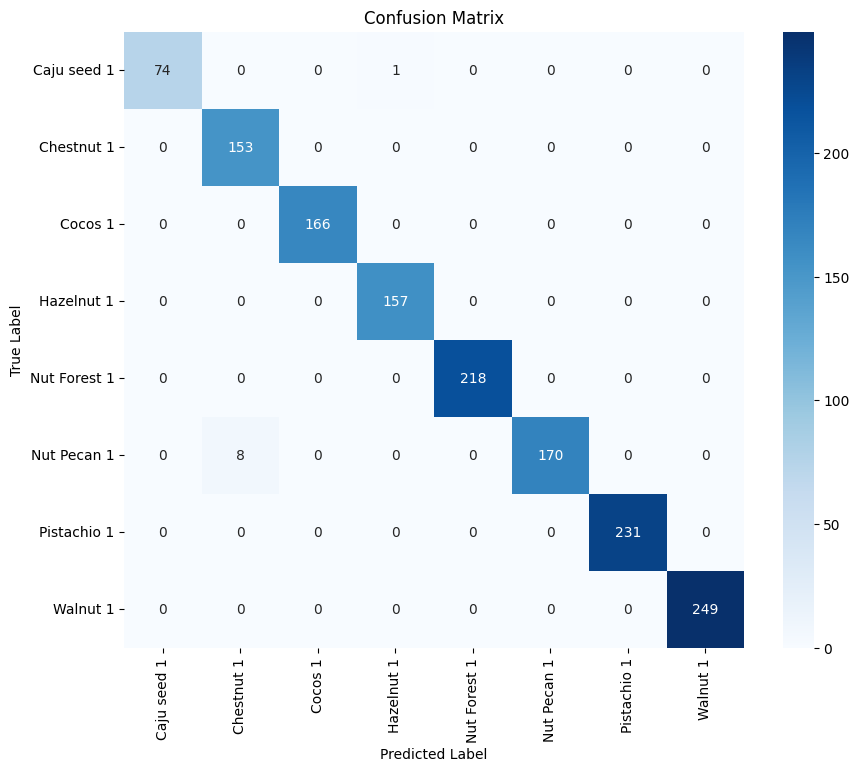

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualisasikan Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            annot=True,
            fmt='d', # 'd' format ensures integers are displayed
            cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# (Tambahkan Analisis Manual di Notebook Anda)
# Analisis wajib dilakukan berdasarkan matriks ini.

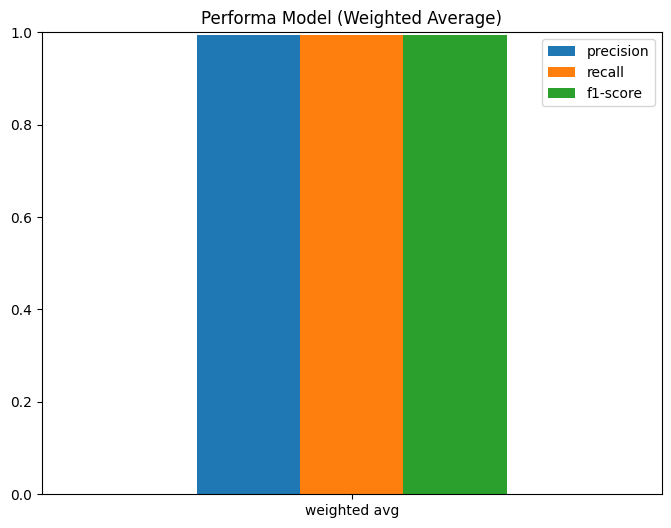

In [ ]:
import pandas as pd
# Contoh: Grafik Presisi, Recall, F1-Score (Weighted Avg)
report = classification_report(y_test, y_pred_test, output_dict=True, target_names=classes)
metrics_df = pd.DataFrame(report).transpose()
# Ambil baris ringkasan (weighted avg)
summary = metrics_df.loc[['weighted avg'], ['precision', 'recall', 'f1-score']]

# Buat grafik (memerlukan import pandas as pd)
summary.plot(kind='bar', figsize=(8, 6))
plt.title('Performa Model (Weighted Average)')
plt.ylim(0, 1) # Batas y dari 0 hingga 1
plt.xticks(rotation=0)
plt.show()

# **4. Pembuatan Data Latih dan Data Uji**

- **Gunakan split data yang sudah ada:** Folder **Training** (67k citra, *dengan label 6 kategori*) digunakan untuk melatih model, dan folder **Test** (22k citra, *dengan label 6 kategori*) digunakan **hanya untuk evaluasi akhir**.
- **Dilarang menggabungkan** folder Training dan Test.
- Untuk proses *hyperparameter tuning*, lakukan metode *split* atau *cross-validation* (k=5) **hanya pada data dari folder Training (67k)**.

## Kategori Jeruk

In [ ]:
import numpy as np
import os
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# ... (impor model klasifikasi yang akan digunakan, misal: SVC)

# --- Path Dataset ---
base_dir_train = '/content/drive/MyDrive/ML /dataset PBL/Training/sitrus'
base_dir_test = '/content/drive/MyDrive/ML /dataset PBL/Test/sitrus'

EXPECTED_FEATURE_DIM = 522 # 512 from color histogram + 10 from LBP histogram

# 1. Ekstraksi Data TRAINING
X_train_list = []
y_train_list = []
classes = sorted(os.listdir(base_dir_train)) # Ambil label dari folder Training

print("Memulai Ekstraksi Fitur Data TRAINING...")
for label, class_name in enumerate(classes):
    class_path = os.path.join(base_dir_train, class_name)
    image_files = os.listdir(class_path)

    # Menggunakan tqdm untuk progress bar
    for img_name in tqdm(image_files, desc=f"Ekstraksi Training {class_name}"):
        img_path = os.path.join(class_path, img_name)

        # Add a check to ensure it's a file and not a directory
        if os.path.isfile(img_path):
            features = extract_combined_features(img_path) # USE ACTUAL FEATURE EXTRACTION
            if features is not None:
                try:
                    # Explicitly convert to a float32 numpy array and verify its shape
                    features_arr = np.array(features, dtype=np.float32)
                    if features_arr.ndim == 1 and features_arr.shape[0] == EXPECTED_FEATURE_DIM:
                        X_train_list.append(features_arr)
                        y_train_list.append(label)
                    else:
                        print(f"DEBUG: {img_name} in {class_name} has unexpected feature dimension: {features_arr.shape}. Expected 1D array of length {EXPECTED_FEATURE_DIM}.")
                except Exception as e:
                    print(f"DEBUG: Error converting or checking features for {img_name} in {class_name}: {e}")
            else: # Corrected indentation
                print(f"DEBUG: Could not extract features (returned None) for {img_name} in {class_name}.")

# Konversi ke NumPy Array
X_train = np.array(X_train_list)
y_train = np.array(y_train_list)


# 2. Ekstraksi Data TESTING (Menggunakan label yang sama dari data Training)
X_test_list = []
y_test_list = []

print("Memulai Ekstraksi Fitur Data TESTING...")
for label, class_name in enumerate(classes): # Gunakan 'classes' yang sama
    class_path = os.path.join(base_dir_test, class_name)

    # ADDED: Check if the directory exists before trying to list its contents
    if not os.path.isdir(class_path):
        print(f"Warning: Test directory for class '{class_name}' not found: {class_path}. Skipping.")
        continue # Skip to the next class if directory does not exist

    image_files = os.listdir(class_path)

    for img_name in tqdm(image_files, desc=f"Ekstraksi Test {class_name}"):
        img_path = os.path.join(class_path, img_name)
        features = extract_combined_features(img_path) # USE ACTUAL FEATURE EXTRACTION
        if features is not None:
                try:
                    # Explicitly convert to a float32 numpy array and verify its shape
                    features_arr = np.array(features, dtype=np.float32)
                    if features_arr.ndim == 1 and features_arr.shape[0] == EXPECTED_FEATURE_DIM:
                        X_test_list.append(features_arr)
                        y_test_list.append(label)
                    else:
                        print(f"DEBUG: {img_name} in {class_name} has unexpected feature dimension: {features_arr.shape}. Expected 1D array of length {EXPECTED_FEATURE_DIM}.")
                except Exception as e:
                    print(f"DEBUG: Error converting or checking features for {img_name} in {class_name}: {e}")
        else: # Corrected indentation
                print(f"DEBUG: Could not extract features (returned None) for {img_name} in {class_name}.")

# Konversi ke NumPy Array
X_test = np.array(X_test_list)
y_test = np.array(y_test_list)

print(f"\nShape X_train: {X_train.shape}, Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}, Shape y_test: {y_test.shape}")

Memulai Ekstraksi Fitur Data TRAINING...


Ekstraksi Training Tangelo 1: 100%|██████████| 490/490 [00:10<00:00, 48.59it/s]


Memulai Ekstraksi Fitur Data TESTING...


Ekstraksi Test Limes 1: 100%|██████████| 167/167 [00:05<00:00, 30.72it/s]


DEBUG: Could not extract features (returned None) for Orange 1 in Limes 1.


Ekstraksi Test Pomelo Sweetie 1: 100%|██████████| 154/154 [00:04<00:00, 32.59it/s]


DEBUG: Could not extract features (returned None) for Tangelo 1 in Pomelo Sweetie 1.


Ekstraksi Test Tangelo 1: 100%|██████████| 166/166 [00:05<00:00, 31.87it/s]


Shape X_train: (5343, 522), Shape y_train: (5343,)
Shape X_test: (1803, 522), Shape y_test: (1803,)


In [ ]:
# 1. Standardisasi Data
scaler = StandardScaler()
# Pelajari (fit) parameter scaling HANYA dari data training
X_train_scaled = scaler.fit_transform(X_train)
# Terapkan (transform) parameter scaling yang sama ke data testing
X_test_scaled = scaler.transform(X_test)

# 2. Reduksi Dimensi dengan PCA
# Asumsi kita ingin mempertahankan 90% variansi
pca = PCA(n_components=0.90)
# Pelajari (fit) komponen PCA HANYA dari data training
X_train_final = pca.fit_transform(X_train_scaled)
# Terapkan (transform) komponen PCA yang sama ke data testing
X_test_final = pca.transform(X_test_scaled)

print(f"\nShape X_train (Final): {X_train_final.shape}")
print(f"Shape X_test (Final): {X_test_final.shape}")


Shape X_train (Final): (5343, 118)
Shape X_test (Final): (1803, 118)


# **5. Pembuatan Model**

- Model yang digunakan **bebas, kecuali jenis *deep learning*** (CNN, dsb.).
- Contoh model: **SVM**, **Random Forest**, **Logistic Regression**, atau **KNN**.
- Melakukan proses *hyperparameter tuning* menjadi nilai tambah.
- Simpan model final dalam bentuk file (misal: `.pkl` atau `.joblib`).

## Kategori jeruk

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 1. Definisikan Model dan Parameter Tuning
model = SVC(random_state=42) # Kita gunakan Support Vector Classifier sebagai contoh
param_grid = {
    'C': [0.1, 1, 10],            # Parameter Regularization
    'kernel': ['rbf', 'linear'],  # Jenis kernel
    'gamma': ['scale', 0.01, 0.1] # Parameter kernel untuk 'rbf'
}

# 2. Definisikan Strategi Cross-Validation
# KFold(n_splits=5) akan membagi data training menjadi 5 lipatan (fold)
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Inisialisasi GridSearchCV
# cv=cv_strategy memastikan k=5 Cross-Validation
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=cv_strategy,
                           scoring='accuracy', # Metrik yang digunakan untuk memilih yang terbaik
                           verbose=2,
                           n_jobs=-1)

print("\nMemulai Hyperparameter Tuning dengan 5-fold Cross-Validation...")

# 4. Lakukan Tuning (Hanya pada data Training)
grid_search.fit(X_train_final, y_train)

# --- HASIL TUNING ---
print("\n=== Hasil Hyperparameter Tuning ===")
print("Hyperparameter Terbaik:", grid_search.best_params_)
print(f"Skor Cross-Validation Terbaik (Akurasi): {grid_search.best_score_:.4f}")

# 5. Model Akhir
# Ambil model terbaik hasil tuning
best_model = grid_search.best_estimator_


Memulai Hyperparameter Tuning dengan 5-fold Cross-Validation...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

=== Hasil Hyperparameter Tuning ===
Hyperparameter Terbaik: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Skor Cross-Validation Terbaik (Akurasi): 1.0000


In [ ]:
output_path = '/content/drive/MyDrive/PBL_Model_Output/best_svc_jeruk_model.pkl'
joblib.dump(best_model, output_path)
print(f"Model terbaik disimpan di: {output_path}")

Model terbaik disimpan di: /content/drive/MyDrive/PBL_Model_Output/best_svc_jeruk_model.pkl


# **6. Evaluasi Model**

- Evaluasi performa model final menggunakan data dari folder **Test** (22k citra).
- Evaluasi metriks:
    - Akurasi (keseluruhan).
    - Presisi (gunakan *macro* atau *weighted average*).
    - Recall (gunakan *macro* atau *weighted average*).
    - F1-Score (gunakan *macro* atau *weighted average*).
- **Wajib:** Sajikan **Confusion Matrix** (ukuran 6x6) dan berikan analisisnya (misal: kategori apa yang paling sering salah diklasifikasikan?).
- Sajikan hasil performansi model menggunakan grafik.

## Kategori jeruk

In [ ]:
print("\n=== Evaluasi Akhir Menggunakan Data Test (22k citra) ===")

# Prediksi menggunakan model terbaik pada data test yang sudah diproses
y_pred_test = best_model.predict(X_test_final)

# Tampilkan laporan klasifikasi
print(classification_report(y_test, y_pred_test, target_names=classes))


=== Evaluasi Akhir Menggunakan Data Test (22k citra) ===
                    precision    recall  f1-score   support

      Clementine 1       1.00      1.00      1.00       166
 Grapefruit Pink 1       1.00      1.00      1.00       166
Grapefruit White 1       1.00      1.00      1.00       164
        Kumquats 1       1.00      1.00      1.00       166
           Lemon 1       1.00      1.00      1.00       164
     Lemon Meyer 1       1.00      1.00      1.00       166
           Limes 1       1.00      1.00      1.00       166
       Mandarine 1       1.00      1.00      1.00       166
          Orange 1       1.00      1.00      1.00       160
  Pomelo Sweetie 1       1.00      1.00      1.00       153
         Tangelo 1       1.00      1.00      1.00       166

          accuracy                           1.00      1803
         macro avg       1.00      1.00      1.00      1803
      weighted avg       1.00      1.00      1.00      1803



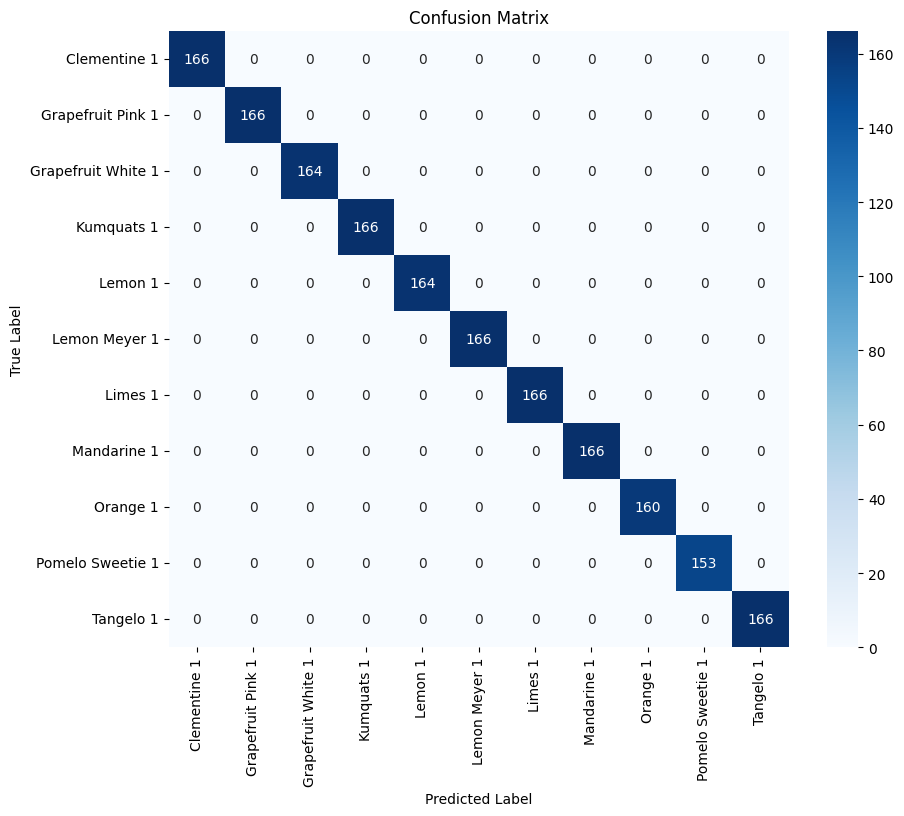

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualisasikan Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            annot=True,
            fmt='d', # 'd' format ensures integers are displayed
            cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# (Tambahkan Analisis Manual di Notebook Anda)
# Analisis wajib dilakukan berdasarkan matriks ini.

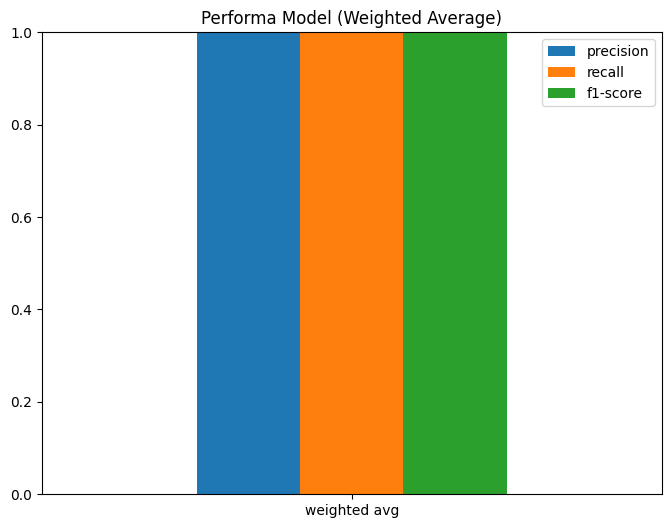

In [ ]:
import pandas as pd
# Contoh: Grafik Presisi, Recall, F1-Score (Weighted Avg)
report = classification_report(y_test, y_pred_test, output_dict=True, target_names=classes)
metrics_df = pd.DataFrame(report).transpose()
# Ambil baris ringkasan (weighted avg)
summary = metrics_df.loc[['weighted avg'], ['precision', 'recall', 'f1-score']]

# Buat grafik (memerlukan import pandas as pd)
summary.plot(kind='bar', figsize=(8, 6))
plt.title('Performa Model (Weighted Average)')
plt.ylim(0, 1) # Batas y dari 0 hingga 1
plt.xticks(rotation=0)
plt.show()

# **4. Pembuatan Data Latih dan Data Uji**

- **Gunakan split data yang sudah ada:** Folder **Training** (67k citra, *dengan label 6 kategori*) digunakan untuk melatih model, dan folder **Test** (22k citra, *dengan label 6 kategori*) digunakan **hanya untuk evaluasi akhir**.
- **Dilarang menggabungkan** folder Training dan Test.
- Untuk proses *hyperparameter tuning*, lakukan metode *split* atau *cross-validation* (k=5) **hanya pada data dari folder Training (67k)**.

## Kategori melon

In [ ]:
import numpy as np
import os
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# ... (impor model klasifikasi yang akan digunakan, misal: SVC)

# --- Path Dataset ---
base_dir_train = '/content/drive/MyDrive/ML /dataset PBL/Training/melon'
base_dir_test = '/content/drive/MyDrive/ML /dataset PBL/Test/melon'

EXPECTED_FEATURE_DIM = 522 # 512 from color histogram + 10 from LBP histogram

# 1. Ekstraksi Data TRAINING
X_train_list = []
y_train_list = []
classes = sorted(os.listdir(base_dir_train)) # Ambil label dari folder Training

print("Memulai Ekstraksi Fitur Data TRAINING...")
for label, class_name in enumerate(classes):
    class_path = os.path.join(base_dir_train, class_name)
    image_files = os.listdir(class_path)

    # Menggunakan tqdm untuk progress bar
    for img_name in tqdm(image_files, desc=f"Ekstraksi Training {class_name}"):
        img_path = os.path.join(class_path, img_name)

        # Add a check to ensure it's a file and not a directory
        if os.path.isfile(img_path):
            features = extract_combined_features(img_path) # USE ACTUAL FEATURE EXTRACTION
            if features is not None:
                try:
                    # Explicitly convert to a float32 numpy array and verify its shape
                    features_arr = np.array(features, dtype=np.float32)
                    if features_arr.ndim == 1 and features_arr.shape[0] == EXPECTED_FEATURE_DIM:
                        X_train_list.append(features_arr)
                        y_train_list.append(label)
                    else:
                        print(f"DEBUG: {img_name} in {class_name} has unexpected feature dimension: {features_arr.shape}. Expected 1D array of length {EXPECTED_FEATURE_DIM}.")
                except Exception as e:
                    print(f"DEBUG: Error converting or checking features for {img_name} in {class_name}: {e}")
            else: # Corrected indentation
                print(f"DEBUG: Could not extract features (returned None) for {img_name} in {class_name}.")

# Konversi ke NumPy Array
X_train = np.array(X_train_list)
y_train = np.array(y_train_list)


# 2. Ekstraksi Data TESTING (Menggunakan label yang sama dari data Training)
X_test_list = []
y_test_list = []

print("Memulai Ekstraksi Fitur Data TESTING...")
for label, class_name in enumerate(classes): # Gunakan 'classes' yang sama
    class_path = os.path.join(base_dir_test, class_name)

    # ADDED: Check if the directory exists before trying to list its contents
    if not os.path.isdir(class_path):
        print(f"Warning: Test directory for class '{class_name}' not found: {class_path}. Skipping.")
        continue # Skip to the next class if directory does not exist

    image_files = os.listdir(class_path)

    for img_name in tqdm(image_files, desc=f"Ekstraksi Test {class_name}"):
        img_path = os.path.join(class_path, img_name)
        features = extract_combined_features(img_path) # USE ACTUAL FEATURE EXTRACTION
        if features is not None:
                try:
                    # Explicitly convert to a float32 numpy array and verify its shape
                    features_arr = np.array(features, dtype=np.float32)
                    if features_arr.ndim == 1 and features_arr.shape[0] == EXPECTED_FEATURE_DIM:
                        X_test_list.append(features_arr)
                        y_test_list.append(label)
                    else:
                        print(f"DEBUG: {img_name} in {class_name} has unexpected feature dimension: {features_arr.shape}. Expected 1D array of length {EXPECTED_FEATURE_DIM}.")
                except Exception as e:
                    print(f"DEBUG: Error converting or checking features for {img_name} in {class_name}: {e}")
        else: # Corrected indentation
                print(f"DEBUG: Could not extract features (returned None) for {img_name} in {class_name}.")

# Konversi ke NumPy Array
X_test = np.array(X_test_list)
y_test = np.array(y_test_list)

print(f"\nShape X_train: {X_train.shape}, Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}, Shape y_test: {y_test.shape}")

Memulai Ekstraksi Fitur Data TRAINING...


Ekstraksi Training Melon Piel de Sapo 1: 100%|██████████| 738/738 [00:15<00:00, 46.84it/s]


Memulai Ekstraksi Fitur Data TESTING...


Ekstraksi Test Melon Piel de Sapo 1: 100%|██████████| 246/246 [00:06<00:00, 37.81it/s]


Shape X_train: (1722, 522), Shape y_train: (1722,)
Shape X_test: (574, 522), Shape y_test: (574,)


In [ ]:
# 1. Standardisasi Data
scaler = StandardScaler()
# Pelajari (fit) parameter scaling HANYA dari data training
X_train_scaled = scaler.fit_transform(X_train)
# Terapkan (transform) parameter scaling yang sama ke data testing
X_test_scaled = scaler.transform(X_test)

# 2. Reduksi Dimensi dengan PCA
# Asumsi kita ingin mempertahankan 90% variansi
pca = PCA(n_components=0.90)
# Pelajari (fit) komponen PCA HANYA dari data training
X_train_final = pca.fit_transform(X_train_scaled)
# Terapkan (transform) komponen PCA yang sama ke data testing
X_test_final = pca.transform(X_test_scaled)

print(f"\nShape X_train (Final): {X_train_final.shape}")
print(f"Shape X_test (Final): {X_test_final.shape}")


Shape X_train (Final): (1722, 73)
Shape X_test (Final): (574, 73)


# **5. Pembuatan Model**

- Model yang digunakan **bebas, kecuali jenis *deep learning*** (CNN, dsb.).
- Contoh model: **SVM**, **Random Forest**, **Logistic Regression**, atau **KNN**.
- Melakukan proses *hyperparameter tuning* menjadi nilai tambah.
- Simpan model final dalam bentuk file (misal: `.pkl` atau `.joblib`).


## Kategori melon

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 1. Definisikan Model dan Parameter Tuning
model = SVC(random_state=42) # Kita gunakan Support Vector Classifier sebagai contoh
param_grid = {
    'C': [0.1, 1, 10],            # Parameter Regularization
    'kernel': ['rbf', 'linear'],  # Jenis kernel
    'gamma': ['scale', 0.01, 0.1] # Parameter kernel untuk 'rbf'
}

# 2. Definisikan Strategi Cross-Validation
# KFold(n_splits=5) akan membagi data training menjadi 5 lipatan (fold)
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Inisialisasi GridSearchCV
# cv=cv_strategy memastikan k=5 Cross-Validation
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=cv_strategy,
                           scoring='accuracy', # Metrik yang digunakan untuk memilih yang terbaik
                           verbose=2,
                           n_jobs=-1)

print("\nMemulai Hyperparameter Tuning dengan 5-fold Cross-Validation...")

# 4. Lakukan Tuning (Hanya pada data Training)
grid_search.fit(X_train_final, y_train)

# --- HASIL TUNING ---
print("\n=== Hasil Hyperparameter Tuning ===")
print("Hyperparameter Terbaik:", grid_search.best_params_)
print(f"Skor Cross-Validation Terbaik (Akurasi): {grid_search.best_score_:.4f}")

# 5. Model Akhir
# Ambil model terbaik hasil tuning
best_model = grid_search.best_estimator_


Memulai Hyperparameter Tuning dengan 5-fold Cross-Validation...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

=== Hasil Hyperparameter Tuning ===
Hyperparameter Terbaik: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Skor Cross-Validation Terbaik (Akurasi): 1.0000


In [ ]:
output_path = '/content/drive/MyDrive/PBL_Model_Output/best_svc_melon_model.pkl'
joblib.dump(best_model, output_path)
print(f"Model terbaik disimpan di: {output_path}")

Model terbaik disimpan di: /content/drive/MyDrive/PBL_Model_Output/best_svc_melon_model.pkl


# **6. Evaluasi Model**

- Evaluasi performa model final menggunakan data dari folder **Test** (22k citra).
- Evaluasi metriks:
    - Akurasi (keseluruhan).
    - Presisi (gunakan *macro* atau *weighted average*).
    - Recall (gunakan *macro* atau *weighted average*).
    - F1-Score (gunakan *macro* atau *weighted average*).
- **Wajib:** Sajikan **Confusion Matrix** (ukuran 6x6) dan berikan analisisnya (misal: kategori apa yang paling sering salah diklasifikasikan?).
- Sajikan hasil performansi model menggunakan grafik.

## Kategori melon

In [ ]:
print("\n=== Evaluasi Akhir Menggunakan Data Test (22k citra) ===")

# Prediksi menggunakan model terbaik pada data test yang sudah diproses
y_pred_test = best_model.predict(X_test_final)

# Tampilkan laporan klasifikasi
print(classification_report(y_test, y_pred_test, target_names=classes))


=== Evaluasi Akhir Menggunakan Data Test (22k citra) ===
                      precision    recall  f1-score   support

        Cantaloupe 1       0.99      1.00      1.00       164
        Cantaloupe 2       1.00      0.99      1.00       164
Melon Piel de Sapo 1       1.00      1.00      1.00       246

            accuracy                           1.00       574
           macro avg       1.00      1.00      1.00       574
        weighted avg       1.00      1.00      1.00       574



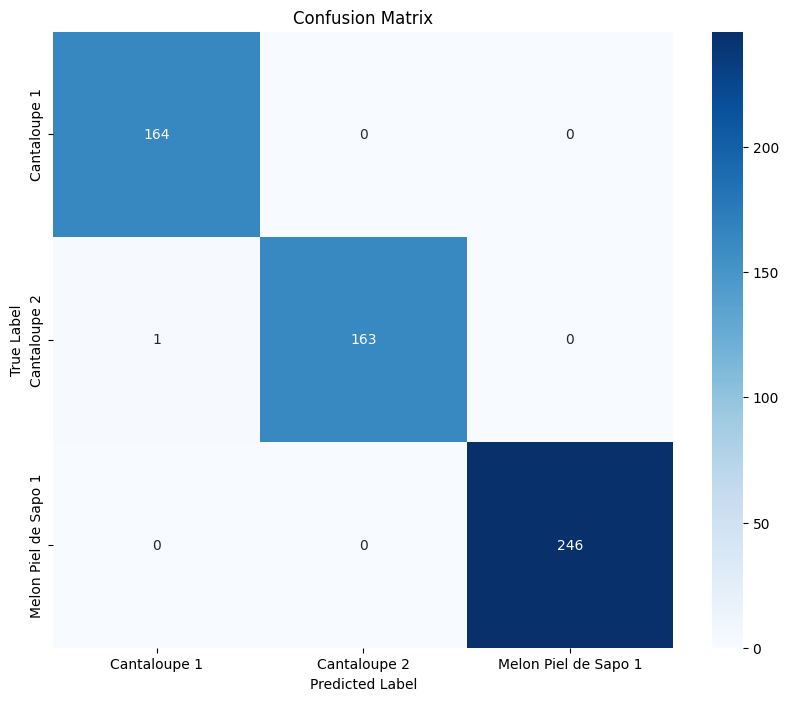

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualisasikan Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            annot=True,
            fmt='d', # 'd' format ensures integers are displayed
            cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# (Tambahkan Analisis Manual di Notebook Anda)
# Analisis wajib dilakukan berdasarkan matriks ini.

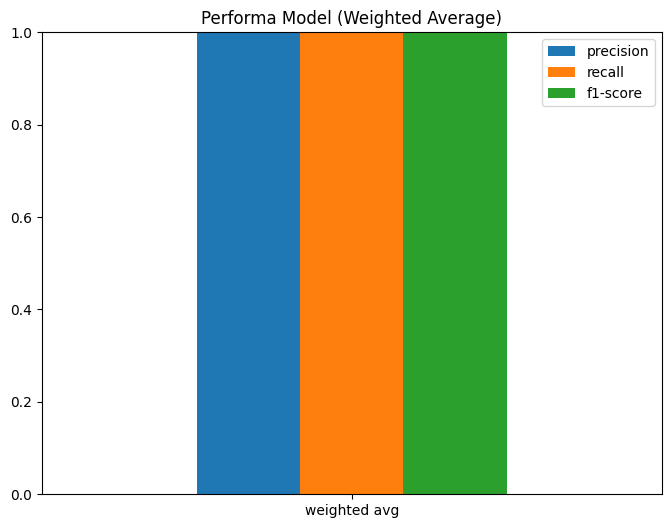

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report # Ensure import for clarity
import matplotlib.pyplot as plt # Ensure import for clarity

# Recalculate y_pred_test for the current category (melon)
y_pred_test = best_model.predict(X_test_final)

# Contoh: Grafik Presisi, Recall, F1-Score (Weighted Avg)
report = classification_report(y_test, y_pred_test, output_dict=True, target_names=classes)
metrics_df = pd.DataFrame(report).transpose()
# Ambil baris ringkasan (weighted avg)
summary = metrics_df.loc[['weighted avg'], ['precision', 'recall', 'f1-score']]

# Buat grafik (memerlukan import pandas as pd)
summary.plot(kind='bar', figsize=(8, 6))
plt.title('Performa Model (Weighted Average)')
plt.ylim(0, 1) # Batas y dari 0 hingga 1
plt.xticks(rotation=0)
plt.show()

# **METODE KNN**

## Kategori Kacang

### Menyiapkan library yang dibutuhkan

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import joblib  # Untuk save model
import matplotlib.pyplot as plt
import seaborn as sns


### Mengimplementasikan KNN untuk memproses dataset

=== KATEGORI KACANG - KNN LENGKAP ===
📁 Ekstraksi fitur Training & Test...


Ekstraksi Test Walnut 1: 100%|██████████| 249/249 [00:04<00:00, 52.77it/s]


Shape Xtrain: (4252, 522), ytrain: (4252,)
Shape Xtest: (1427, 522), ytest: (1427,)
🔄 Preprocessing: Scaling + PCA...
Shape Xtrain Final: (4252, 108)
Shape Xtest Final: (1427, 108)
🎯 KNN Hyperparameter Tuning...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Hasil Hyperparameter Tuning
Hyperparameter Terbaik: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Skor CV Terbaik: 0.9995

📊 Evaluasi Test Set:
              precision    recall  f1-score   support

 Caju seed 1       1.00      1.00      1.00        75
  Chestnut 1       1.00      1.00      1.00       153
     Cocos 1       1.00      1.00      1.00       166
  Hazelnut 1       1.00      1.00      1.00       157
Nut Forest 1       1.00      1.00      1.00       218
 Nut Pecan 1       1.00      1.00      1.00       178
 Pistachio 1       1.00      1.00      1.00       231
    Walnut 1       1.00      1.00      1.00       249

    accuracy                           1.00      1427
   macro avg       1.0

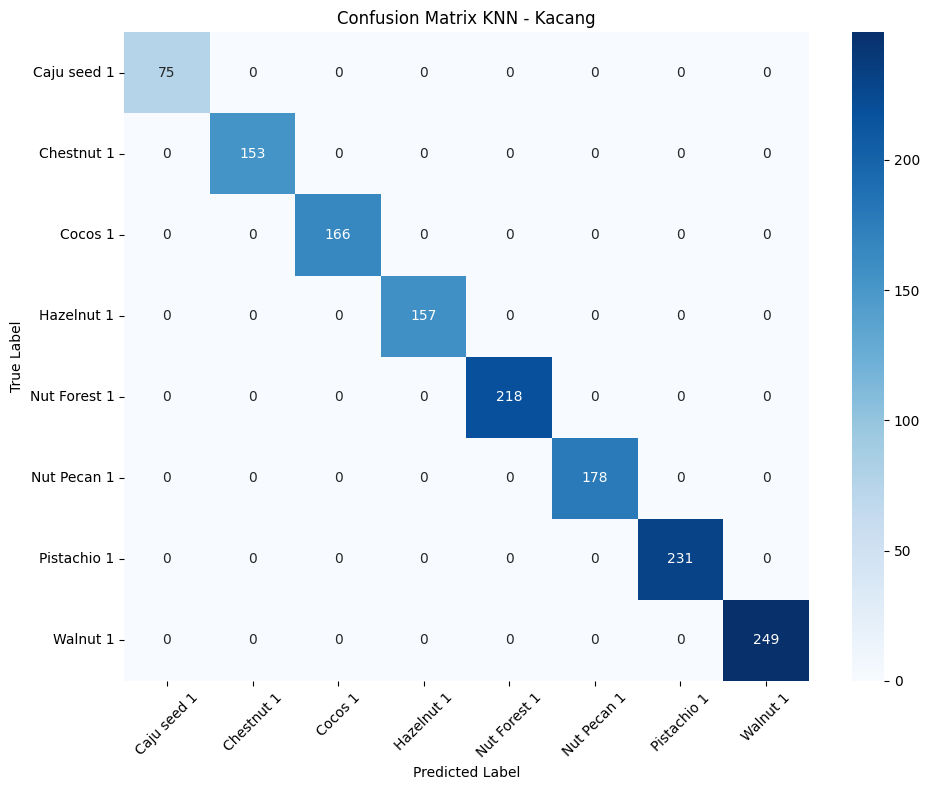

✅ Model KNN Kacang disimpan: /content/drive/MyDrive/PBL_Model_Output/best_knn_kacang_model.pkl
🎉 KACANG SELESAI!


In [ ]:
# =============================================================================
# ✅ KODE LENGKAP KNN KATEGORI KACANG

# 1. IMPORT (Sudah ada di notebook, tambahkan KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

print("=== KATEGORI KACANG - KNN LENGKAP ===")

# 2. PATH DATASET KACANG
basedirtrain = '/content/drive/MyDrive/ML /dataset PBL/Training/kacang'
basedirtest  = '/content/drive/MyDrive/ML /dataset PBL/Test/kacang'

# 3. EKSTRAKSI FITUR (JIKA BELUM ADA)
print("📁 Ekstraksi fitur Training & Test...")
Xtrainlist, ytrainlist = [], []
Xtestlist, ytestlist = [], []

classes = sorted(os.listdir(basedirtrain))
EXPECTED_FEATURE_DIM = 522

# TRAINING DATA
for label, classname in enumerate(classes):
    classpath = os.path.join(basedirtrain, classname)
    imagefiles = os.listdir(classpath)
    for imgname in tqdm(imagefiles, desc=f"Ekstraksi Training {classname}"):
        imgpath = os.path.join(classpath, imgname)
        if os.path.isfile(imgpath):
            features = extract_combined_features(imgpath)
            if features is not None:
                featuresarr = np.array(features, dtype=np.float32)
                if featuresarr.ndim == 1 and featuresarr.shape[0] == EXPECTED_FEATURE_DIM:
                    Xtrainlist.append(featuresarr)
                    ytrainlist.append(label)

Xtrain = np.array(Xtrainlist)
ytrain = np.array(ytrainlist)

# TEST DATA
for label, classname in enumerate(classes):
    classpath = os.path.join(basedirtest, classname)
    if not os.path.isdir(classpath):
        print(f"Warning: Test directory {classname} not found")
        continue
    imagefiles = os.listdir(classpath)
    for imgname in tqdm(imagefiles, desc=f"Ekstraksi Test {classname}"):
        imgpath = os.path.join(classpath, imgname)
        if os.path.isfile(imgpath):
            features = extract_combined_features(imgpath)
            if features is not None:
                featuresarr = np.array(features, dtype=np.float32)
                if featuresarr.ndim == 1 and featuresarr.shape[0] == EXPECTED_FEATURE_DIM:
                    Xtestlist.append(featuresarr)
                    ytestlist.append(label)

Xtest = np.array(Xtestlist)
ytest = np.array(ytestlist)

print(f"Shape Xtrain: {Xtrain.shape}, ytrain: {ytrain.shape}")
print(f"Shape Xtest: {Xtest.shape}, ytest: {ytest.shape}")

# 4. PREPROCESSING (Scaling + PCA)
print("🔄 Preprocessing: Scaling + PCA...")
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

pca = PCA(n_components=0.90)
Xtrainfinal = pca.fit_transform(Xtrain_scaled)
Xtestfinal = pca.transform(Xtest_scaled)

print(f"Shape Xtrain Final: {Xtrainfinal.shape}")
print(f"Shape Xtest Final: {Xtestfinal.shape}")

# 5. KNN HYPERPARAMETER TUNING
print("🎯 KNN Hyperparameter Tuning...")
knn_model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(Xtrainfinal, ytrain)

print("Hasil Hyperparameter Tuning")
print("Hyperparameter Terbaik:", grid_search.best_params_)
print(f"Skor CV Terbaik: {grid_search.best_score_:.4f}")

best_knn = grid_search.best_estimator_

# 6. EVALUASI
print("\n📊 Evaluasi Test Set:")
ypred_test = best_knn.predict(Xtestfinal)
print(classification_report(ytest, ypred_test, target_names=classes))

# Confusion Matrix
cm = confusion_matrix(ytest, ypred_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix KNN - Kacang')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 7. SIMPAN MODEL
output_path = '/content/drive/MyDrive/PBL_Model_Output/best_knn_kacang_model.pkl'
joblib.dump(best_knn, output_path)
joblib.dump(scaler, output_path.replace('knn', 'scaler'))
joblib.dump(pca, output_path.replace('knn', 'pca'))
print(f"✅ Model KNN Kacang disimpan: {output_path}")

print("🎉 KACANG SELESAI!")

## Kategori Jeruk

=== KATEGORI KACANG - KNN LENGKAP ===
📁 Ekstraksi fitur Training & Test...


Ekstraksi Test Tangelo 1: 100%|██████████| 166/166 [00:03<00:00, 47.39it/s]


Shape Xtrain: (5343, 522), ytrain: (5343,)
Shape Xtest: (1803, 522), ytest: (1803,)
🔄 Preprocessing: Scaling + PCA...
Shape Xtrain Final: (5343, 118)
Shape Xtest Final: (1803, 118)
🎯 KNN Hyperparameter Tuning...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Hasil Hyperparameter Tuning
Hyperparameter Terbaik: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Skor CV Terbaik: 0.9993

📊 Evaluasi Test Set:
                    precision    recall  f1-score   support

      Clementine 1       0.99      0.99      0.99       166
 Grapefruit Pink 1       1.00      1.00      1.00       166
Grapefruit White 1       1.00      1.00      1.00       164
        Kumquats 1       1.00      1.00      1.00       166
           Lemon 1       1.00      1.00      1.00       164
     Lemon Meyer 1       1.00      1.00      1.00       166
           Limes 1       1.00      1.00      1.00       166
       Mandarine 1       0.97      1.00      0.98       166
          Orange 1     

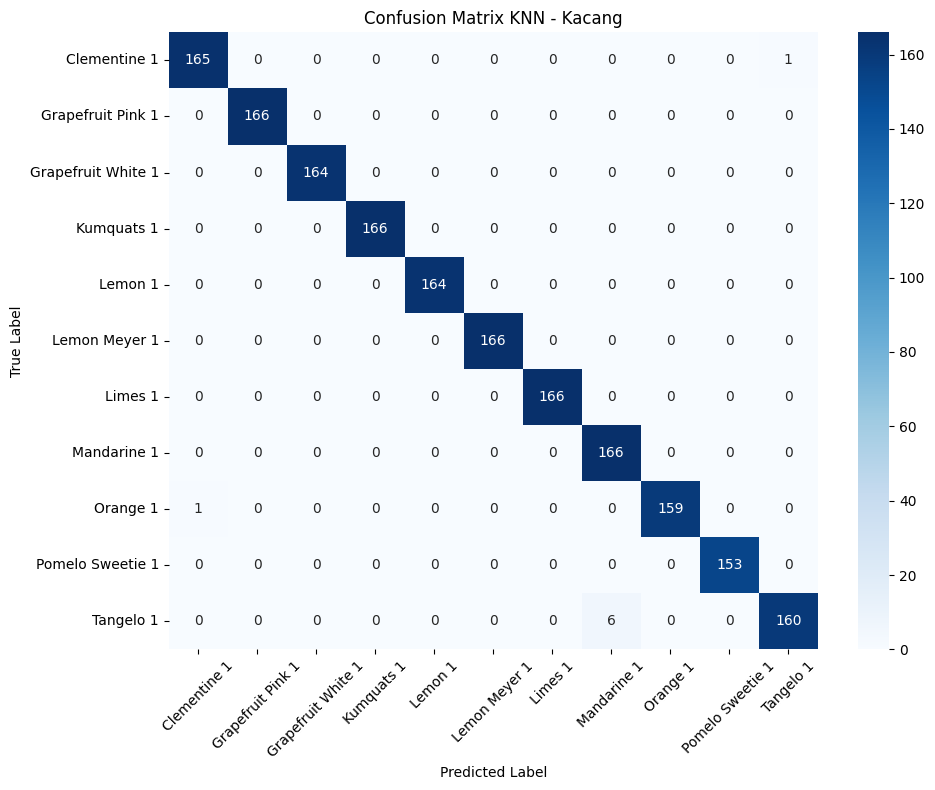

✅ Model KNN Kacang disimpan: /content/drive/MyDrive/PBL_Model_Output/best_knn_kacang_model.pkl
🎉 JERUK SELESAI!


In [ ]:
# =============================================================================
# ✅ KODE LENGKAP KNN KATEGORI JERUK
# =============================================================================

# 1. IMPORT (Sudah ada di notebook, tambahkan KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

print("=== KATEGORI JERUK - KNN LENGKAP ===")

# 2. PATH DATASET KACANG
basedirtrain = '/content/drive/MyDrive/ML /dataset PBL/Training/sitrus'
basedirtest  = '/content/drive/MyDrive/ML /dataset PBL/Test/sitrus'

# 3. EKSTRAKSI FITUR (JIKA BELUM ADA)
print("📁 Ekstraksi fitur Training & Test...")
Xtrainlist, ytrainlist = [], []
Xtestlist, ytestlist = [], []

classes = sorted(os.listdir(basedirtrain))
EXPECTED_FEATURE_DIM = 522

# TRAINING DATA
for label, classname in enumerate(classes):
    classpath = os.path.join(basedirtrain, classname)
    imagefiles = os.listdir(classpath)
    for imgname in tqdm(imagefiles, desc=f"Ekstraksi Training {classname}"):
        imgpath = os.path.join(classpath, imgname)
        if os.path.isfile(imgpath):
            features = extract_combined_features(imgpath)
            if features is not None:
                featuresarr = np.array(features, dtype=np.float32)
                if featuresarr.ndim == 1 and featuresarr.shape[0] == EXPECTED_FEATURE_DIM:
                    Xtrainlist.append(featuresarr)
                    ytrainlist.append(label)

Xtrain = np.array(Xtrainlist)
ytrain = np.array(ytrainlist)

# TEST DATA
for label, classname in enumerate(classes):
    classpath = os.path.join(basedirtest, classname)
    if not os.path.isdir(classpath):
        print(f"Warning: Test directory {classname} not found")
        continue
    imagefiles = os.listdir(classpath)
    for imgname in tqdm(imagefiles, desc=f"Ekstraksi Test {classname}"):
        imgpath = os.path.join(classpath, imgname)
        if os.path.isfile(imgpath):
            features = extract_combined_features(imgpath)
            if features is not None:
                featuresarr = np.array(features, dtype=np.float32)
                if featuresarr.ndim == 1 and featuresarr.shape[0] == EXPECTED_FEATURE_DIM:
                    Xtestlist.append(featuresarr)
                    ytestlist.append(label)

Xtest = np.array(Xtestlist)
ytest = np.array(ytestlist)

print(f"Shape Xtrain: {Xtrain.shape}, ytrain: {ytrain.shape}")
print(f"Shape Xtest: {Xtest.shape}, ytest: {ytest.shape}")

# 4. PREPROCESSING (Scaling + PCA)
print("🔄 Preprocessing: Scaling + PCA...")
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

pca = PCA(n_components=0.90)
Xtrainfinal = pca.fit_transform(Xtrain_scaled)
Xtestfinal = pca.transform(Xtest_scaled)

print(f"Shape Xtrain Final: {Xtrainfinal.shape}")
print(f"Shape Xtest Final: {Xtestfinal.shape}")

# 5. KNN HYPERPARAMETER TUNING
print("🎯 KNN Hyperparameter Tuning...")
knn_model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(Xtrainfinal, ytrain)

print("Hasil Hyperparameter Tuning")
print("Hyperparameter Terbaik:", grid_search.best_params_)
print(f"Skor CV Terbaik: {grid_search.best_score_:.4f}")

best_knn = grid_search.best_estimator_

# 6. EVALUASI
print("\n📊 Evaluasi Test Set:")
ypred_test = best_knn.predict(Xtestfinal)
print(classification_report(ytest, ypred_test, target_names=classes))

# Confusion Matrix
cm = confusion_matrix(ytest, ypred_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix KNN - Jeruk')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 7. SIMPAN MODEL
output_path = '/content/drive/MyDrive/PBL_Model_Output/best_knn_jeruk_model.pkl'
joblib.dump(best_knn, output_path)
joblib.dump(scaler, output_path.replace('knn', 'scaler'))
joblib.dump(pca, output_path.replace('knn', 'pca'))
print(f"✅ Model KNN Kacang disimpan: {output_path}")

print("🎉 JERUK SELESAI!")

## Kategori Melon

=== KATEGORI MELON - KNN LENGKAP ===
📁 Ekstraksi fitur Training & Test...


Ekstraksi Test Melon Piel de Sapo 1: 100%|██████████| 246/246 [00:05<00:00, 46.51it/s]


Shape Xtrain: (1722, 522), ytrain: (1722,)
Shape Xtest: (574, 522), ytest: (574,)
🔄 Preprocessing: Scaling + PCA...
Shape Xtrain Final: (1722, 73)
Shape Xtest Final: (574, 73)
🎯 KNN Hyperparameter Tuning...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Hasil Hyperparameter Tuning
Hyperparameter Terbaik: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Skor CV Terbaik: 1.0000

📊 Evaluasi Test Set:
                      precision    recall  f1-score   support

        Cantaloupe 1       0.99      1.00      1.00       164
        Cantaloupe 2       1.00      0.99      1.00       164
Melon Piel de Sapo 1       1.00      1.00      1.00       246

            accuracy                           1.00       574
           macro avg       1.00      1.00      1.00       574
        weighted avg       1.00      1.00      1.00       574



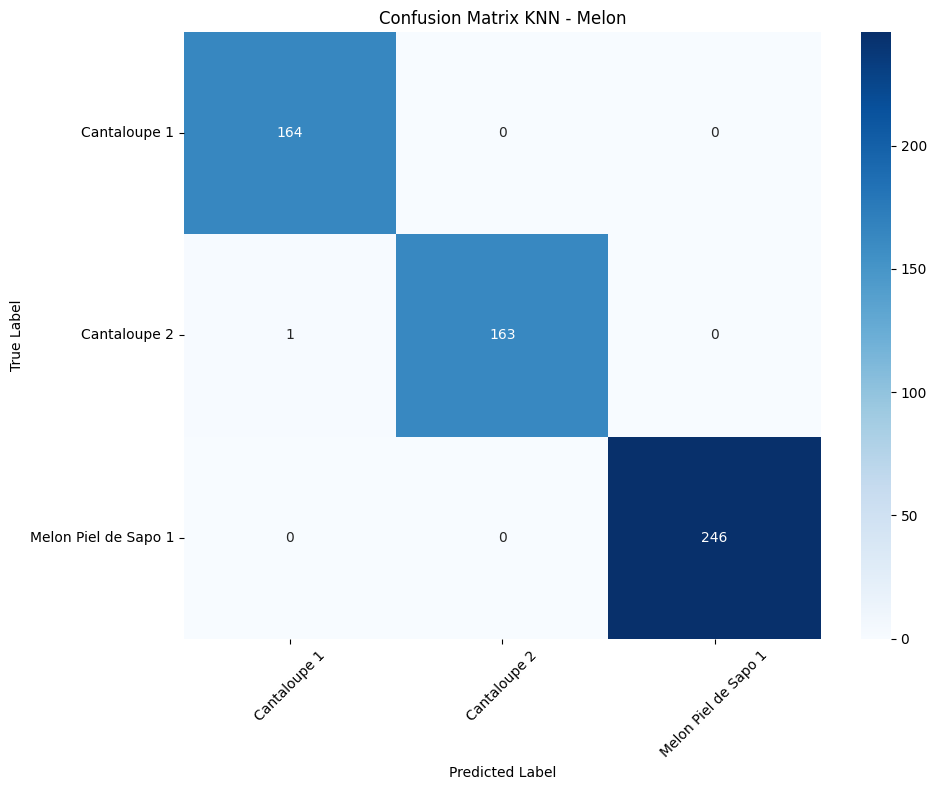

✅ Model KNN Kacang disimpan: /content/drive/MyDrive/PBL_Model_Output/best_knn_melon_model.pkl
🎉 MELON SELESAI!


In [ ]:
# =============================================================================
# ✅ KODE LENGKAP KNN KATEGORI MELON
# =============================================================================

# 1. IMPORT (Sudah ada di notebook, tambahkan KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

print("=== KATEGORI MELON - KNN LENGKAP ===")

# 2. PATH DATASET KACANG
basedirtrain = '/content/drive/MyDrive/ML /dataset PBL/Training/melon'
basedirtest  = '/content/drive/MyDrive/ML /dataset PBL/Test/melon'

# 3. EKSTRAKSI FITUR (JIKA BELUM ADA)
print("📁 Ekstraksi fitur Training & Test...")
Xtrainlist, ytrainlist = [], []
Xtestlist, ytestlist = [], []

classes = sorted(os.listdir(basedirtrain))
EXPECTED_FEATURE_DIM = 522

# TRAINING DATA
for label, classname in enumerate(classes):
    classpath = os.path.join(basedirtrain, classname)
    imagefiles = os.listdir(classpath)
    for imgname in tqdm(imagefiles, desc=f"Ekstraksi Training {classname}"):
        imgpath = os.path.join(classpath, imgname)
        if os.path.isfile(imgpath):
            features = extract_combined_features(imgpath)
            if features is not None:
                featuresarr = np.array(features, dtype=np.float32)
                if featuresarr.ndim == 1 and featuresarr.shape[0] == EXPECTED_FEATURE_DIM:
                    Xtrainlist.append(featuresarr)
                    ytrainlist.append(label)

Xtrain = np.array(Xtrainlist)
ytrain = np.array(ytrainlist)

# TEST DATA
for label, classname in enumerate(classes):
    classpath = os.path.join(basedirtest, classname)
    if not os.path.isdir(classpath):
        print(f"Warning: Test directory {classname} not found")
        continue
    imagefiles = os.listdir(classpath)
    for imgname in tqdm(imagefiles, desc=f"Ekstraksi Test {classname}"):
        imgpath = os.path.join(classpath, imgname)
        if os.path.isfile(imgpath):
            features = extract_combined_features(imgpath)
            if features is not None:
                featuresarr = np.array(features, dtype=np.float32)
                if featuresarr.ndim == 1 and featuresarr.shape[0] == EXPECTED_FEATURE_DIM:
                    Xtestlist.append(featuresarr)
                    ytestlist.append(label)

Xtest = np.array(Xtestlist)
ytest = np.array(ytestlist)

print(f"Shape Xtrain: {Xtrain.shape}, ytrain: {ytrain.shape}")
print(f"Shape Xtest: {Xtest.shape}, ytest: {ytest.shape}")

# 4. PREPROCESSING (Scaling + PCA)
print("🔄 Preprocessing: Scaling + PCA...")
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

pca = PCA(n_components=0.90)
Xtrainfinal = pca.fit_transform(Xtrain_scaled)
Xtestfinal = pca.transform(Xtest_scaled)

print(f"Shape Xtrain Final: {Xtrainfinal.shape}")
print(f"Shape Xtest Final: {Xtestfinal.shape}")

# 5. KNN HYPERPARAMETER TUNING
print("🎯 KNN Hyperparameter Tuning...")
knn_model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(Xtrainfinal, ytrain)

print("Hasil Hyperparameter Tuning")
print("Hyperparameter Terbaik:", grid_search.best_params_)
print(f"Skor CV Terbaik: {grid_search.best_score_:.4f}")

best_knn = grid_search.best_estimator_

# 6. EVALUASI
print("\n📊 Evaluasi Test Set:")
ypred_test = best_knn.predict(Xtestfinal)
print(classification_report(ytest, ypred_test, target_names=classes))

# Confusion Matrix
cm = confusion_matrix(ytest, ypred_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix KNN - Melon')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 7. SIMPAN MODEL
output_path = '/content/drive/MyDrive/PBL_Model_Output/best_knn_melon_model.pkl'
joblib.dump(best_knn, output_path)
joblib.dump(scaler, output_path.replace('knn', 'scaler'))
joblib.dump(pca, output_path.replace('knn', 'pca'))
print(f"✅ Model KNN Kacang disimpan: {output_path}")

print("🎉 MELON SELESAI!")